In [23]:
!pip install gradio -q

In [24]:
%tensorflow_version 2.x

import tensorflow as tf
import gradio as gr

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [25]:
tf.get_logger().setLevel('ERROR')

# TensorFlowでAIモデルを作成する

In [26]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
x_train,x_test = x_train / 255.0, x_test / 255.0

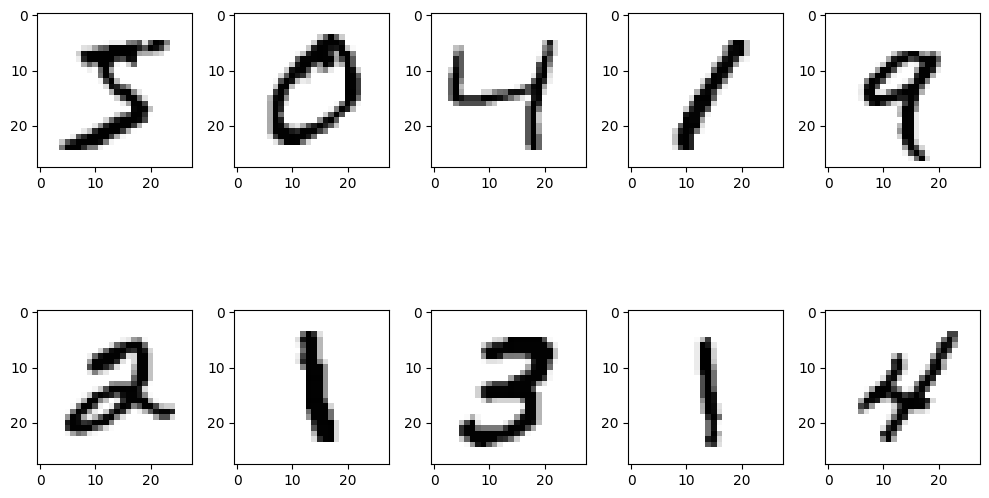

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(10,10),tight_layout=True)

n = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(x_train[n],cmap=plt.cm.binary)
        n += 1

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2927 - accuracy: 0.9161
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1441 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1090 - accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0890 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0763 - accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0663 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0583 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0534 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0487 - accuracy: 0.9842
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step -

In [33]:
_, test_acc = model.evaluate(x_test,y_test,verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.0679 - accuracy: 0.9807 - 2s/epoch - 5ms/step
0.9807000160217285


In [34]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


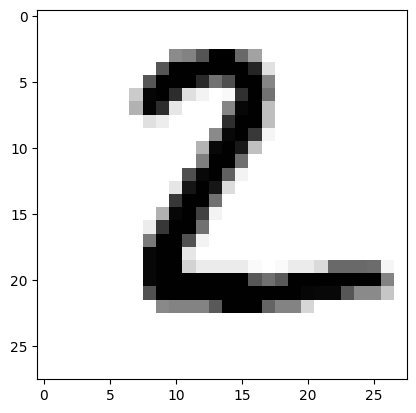

In [35]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
pass

In [36]:
import numpy as np

np.argmax(predictions[1])

2

# Gradioで画像認識アプリにする

In [37]:
def recognize_digit(img):
    img.reshape(1,28,28)
    prediction = model.predict(img).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes=4)
interface = gr.Interface(fn=recognize_digit,inputs='sketchpad',outputs=label,live=True,title='Degit Recognizer')

<ipython-input-37-f5cf40293f74>:6: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=4)
<ipython-input-37-f5cf40293f74>:6: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=4)


In [38]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d83d0c933005d83898.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
